## Regional Coordination and specialisation within the extended system for perception

Haxby & Gobbini (2007) outline a delineation between core and extended face percepton systems
Core - involved in perceptual processing, while extended system is involved in semantic processing. Originally they thought that regions in the extended system are involved in different aspects of semantics, figure(1)

![image](https://user-images.githubusercontent.com/15108226/52062027-01e72080-2570-11e9-8a14-bfbfcaeb3571.jpg)

Putative regional specialisations are
 - vmPFC: Traits, attudes, mental states
 - TPJ (AG): intentions & mental states
 - ATL: biographical knowledge
 - PREC: Episodic memories
 - Amy: Emotions

In [1]:
disp('Date last run')
disp(datestr(datetime))

Date last run
31-Jan-2019 18:54:34


## Results

fMRI data from 24 participants has been collected while they performed different person knowledge tasks

<img width="486" alt="screenshot 2019-01-31 at 15 34 13" src="https://user-images.githubusercontent.com/15108226/52061014-b59ae100-256d-11e9-82cc-ae4f60b3aeb3.png">

In [2]:
loadMR;
cd '/Users/aidasaglinskas/Google Drive/Aidas/Data_words/Scripts/'
aBeta

Loaded 7 variables

aBeta = 

  struct with fields:

    fmat_raw: [21x12x20 double]
        fmat: [21x10x20 double]
      r_lbls: {21x1 cell}
      t_lbls: {12x1 cell}
        trim: [1x1 struct]
      list_R: {21x1 cell}
      list_T: {12x1 cell}
    wmat_raw: [21x12x24 double]
        wmat: [21x10x24 double]



Shaping and re-ordering the data

In [3]:
rlbls = aBeta.r_lbls;
    rlbls = strrep(rlbls,'.mat','');
    rlbls = strrep(rlbls,'-left','-L');
    rlbls = strrep(rlbls,'-right','-R');
    rlbls = strrep(rlbls,'Angular','AG');
    rlbls = strrep(rlbls,'Precuneus','PREC');
    rlbls = strrep(rlbls,'Amygdala','AMY');
tlbls10 = aBeta.t_lbls(1:10);

In [4]:
r_ord = [13 14 9 10 19 20 3 4 17 18 21 7 8 11 12 15 16 5 6 1 2];
t_ord = [3 4 2 9 1 5 7 8 6 10];

%r_ord = 1:21
%t_ord = 1:10
aBeta.wmat = aBeta.wmat(r_ord,t_ord,:);
aBeta.wmat_raw = aBeta.wmat_raw(r_ord,[t_ord 11 12],:);
rlbls = rlbls(r_ord);
tlbls10 = tlbls10(t_ord);

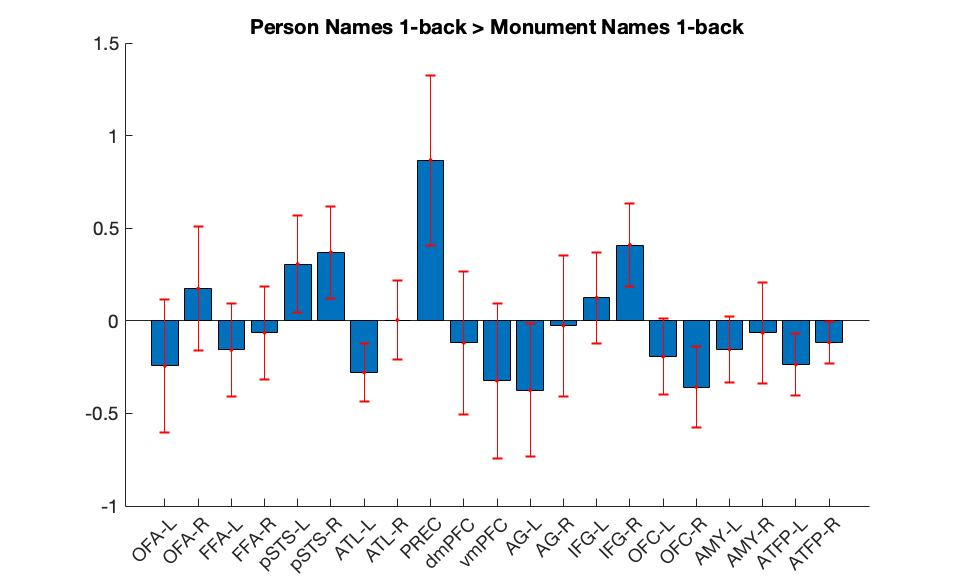

In [5]:
%plot --size 1000,600
m = aBeta.wmat_raw(:,11,:) - aBeta.wmat_raw(:,12,:);
m = squeeze(m);

func_plot_tbar_plot(m',rlbls,1); % Bonferroni Corrected
title('Person Names 1-back > Monument Names 1-back','fontsize',20);
set(gca,'FontSize',14);

In [6]:
[H,P,CI,STATS] = ttest(m(ismember(rlbls,'PREC'),:),0,'tail','right');
t_statement(STATS,P);

t(23) = 1.89,p = 0.036


None of ROIs were selective for people names > monument names after correcting for multiple comparisons (all _p_ > .036 (unc))

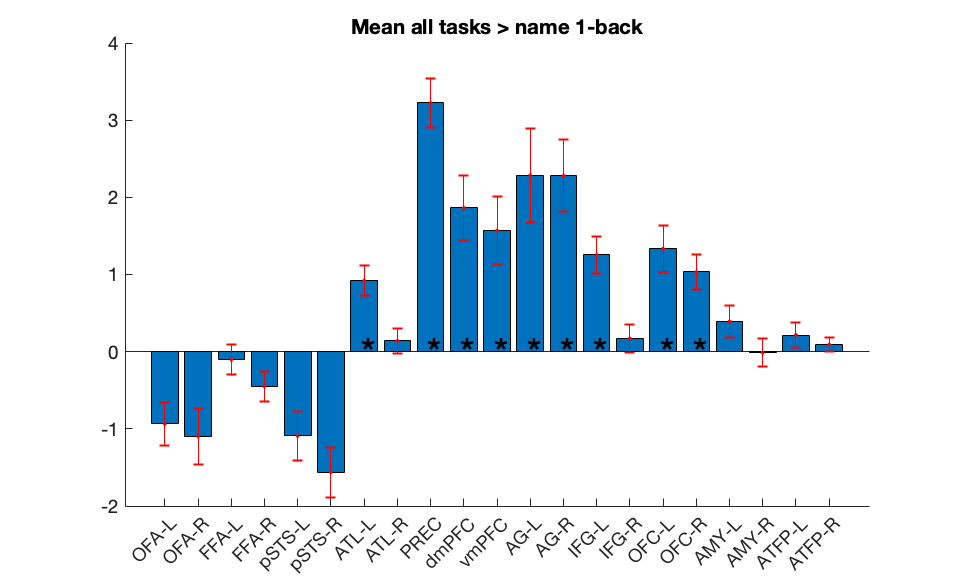

In [7]:
%plot --size 1000,600
m = mean(aBeta.wmat,2);
m = squeeze(m);

func_plot_tbar_plot(m',rlbls,1) % Bonf corrected
title('Mean all tasks > name 1-back','fontsize',20)
set(gca,'FontSize',14)

### Tiny Matrix, averaged across task domain and ROI hemisphere

In [8]:
task_groups = {{'Friendliness' 'Trustworthiness'} {'Attractiveness' 'Distinctiveness'} {'First memory' 'Familiarity'} {'How many facts' 'Occupation'} {'Common name' 'Full name'}};
task_groups_leg = {'Social' 'Physical' 'Episodic' 'Biographical' 'Nominal'};

roi_groups = {{'OFA-L' 'OFA-R'} {'FFA-L' 'FFA-R'} {'pSTS-L' 'pSTS-R'} {'ATL-L' 'ATL-R'} {'PREC'} {'dmPFC'} {'vmPFC'} {'AG-L' 'AG-R'} {'IFG-L' 'IFG-R'} {'OFC-L' 'OFC-R'} {'AMY-L' 'AMY-R'} {'ATFP-L' 'ATFP-R'}};
roi_groups_leg = {'OFA' 'FFA' 'pSTS' 'ATL' 'PREC' 'dmPFC' 'vmPFC' 'AG' 'IFG' 'OFC' 'AMY' 'ATFP'};

tiny_mat = [];
for r = 1:length(roi_groups_leg)
for t = 1:length(task_groups_leg)

v = aBeta.wmat(ismember(rlbls,roi_groups{r}),ismember(tlbls10,task_groups{t}),:);
tiny_mat(r,t,:) = mean(mean(v,1),2);
end
end


tiny.mat = tiny_mat;
tiny.rlbls = roi_groups_leg;
tiny.tlbls = task_groups_leg;


% Trim away core regions
tiny.rlbls(1:3) = [];
tiny.mat(1:3,:,:) = [];


tiny


tiny = 

  struct with fields:

      mat: [9x5x24 double]
    rlbls: {1x9 cell}
    tlbls: {'Social'  'Physical'  'Episodic'  'Biographical'  'Nominal'}



In [9]:
tiny.mat = tiny.mat - mean(tiny.mat,2); % remove regional mean, cleaner tuning profiles
m = mean(tiny.mat,3);
s = std(tiny.mat,[],3);
s = s ./ sqrt(size(tiny.mat,3));

from Haxby & Gobbini (2007) paper: 

Regional contributions: 

 - vmPFC: Traits, attudes, mental states
 - TPJ (AG): intentions & mental states
 - ATL: biographical knowledge
 - PREC: Episodic memories
 - Amy: Emotions

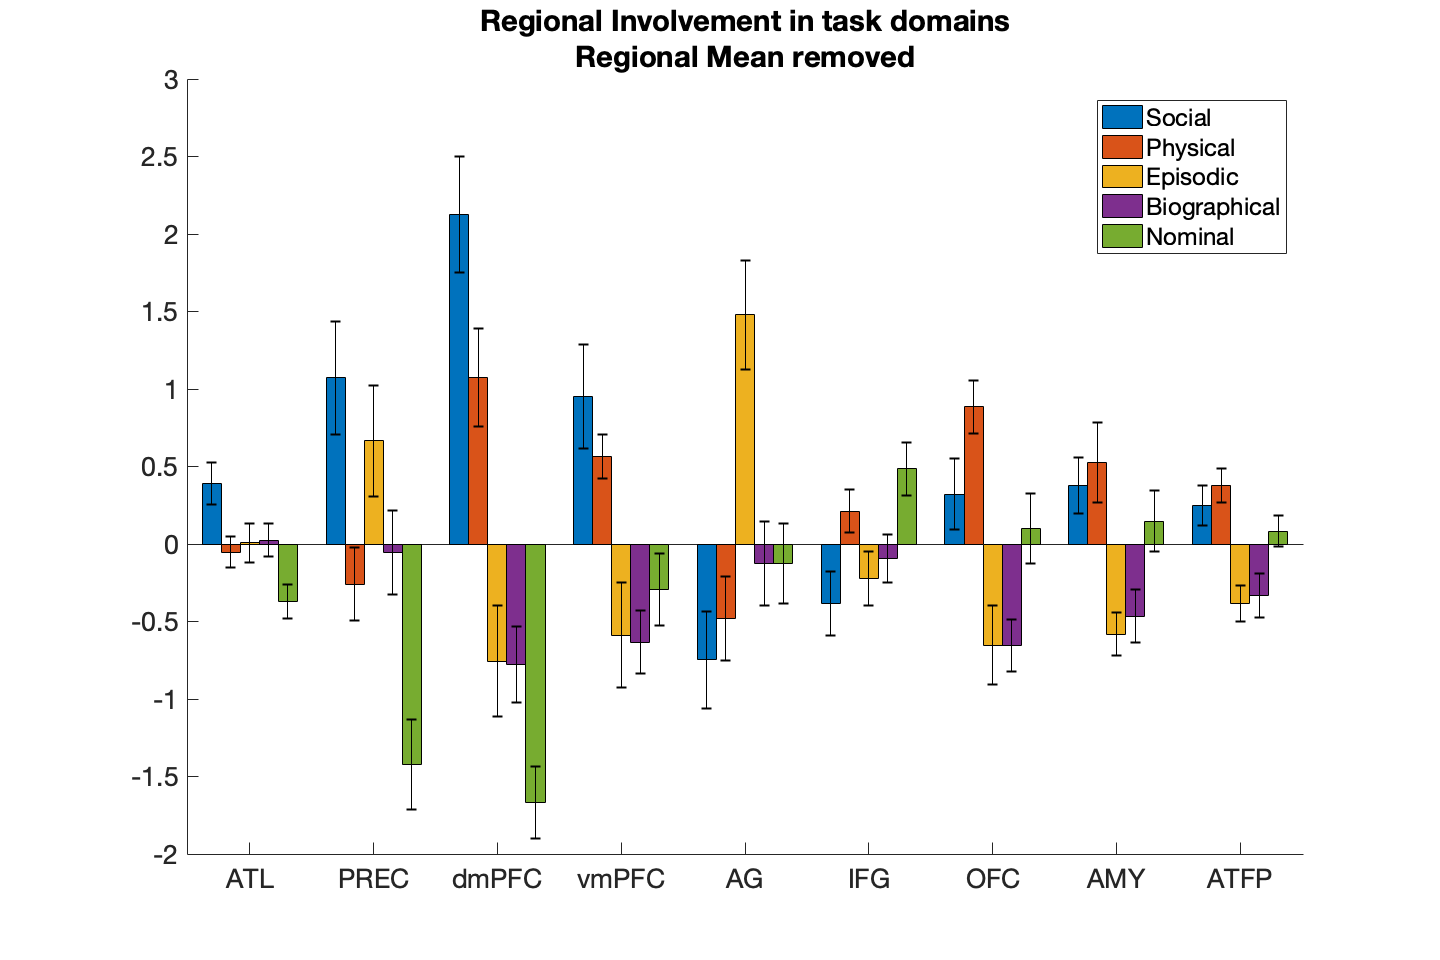

In [10]:
%plot --size 1500,1000
func_grouped_errorbar(m,s)
xticklabels(tiny.rlbls);
legend(tiny.tlbls,'location','best')
box off
set(gca,'fontsize',20);
title({'Regional Involvement in task domains' 'Regional Mean removed'})

Figure shows that: 

- Social and Physical knowldge engaged similar regions
- Episodic knowledge engaged Precuneus and AG
- ATL is tuned to social knowledge

In [11]:
%%file func_tiny_test.m
function func_tiny_test(roi,tiny,print_statements,plot_mats)
% Regional involvement in cognitive Domain STATS for individual regions


if ~exist('print_statements');print_statements=0;end
if ~exist('plot_mats');plot_mats=0;end

disp(sprintf('ROI:%s',roi))
tmat = [];
for t1 = 1:5
for t2 = 1:5
v1 = squeeze(tiny.mat(ismember(tiny.rlbls,roi),t1,:));
v2 = squeeze(tiny.mat(ismember(tiny.rlbls,roi),t2,:));

%t_thresh = 2.069; % p < .05
t_thresh = 3.104; % p < .005 == bonferroni correction for 10 comparisons
%t_thresh = 3.767; % p < .001

[H,P,CI,STATS] = ttest(v1,v2);
tmat(t1,t2) = STATS.tstat;
    if print_statements
    if ~isnan(H)
    if H & STATS.tstat > 0
    disp(sprintf('%s > %s',tiny.tlbls{t1},tiny.tlbls{t2}))
    t_statement(STATS,P);
    end
    end
    end
    
end
end

    if plot_mats
    add_numbers_to_mat(tmat,tiny.tlbls);
    ylabel('Task 1');
    xlabel('Task 2');
    title({roi 'Task 1 > Task 2'},'fontsize',20);
    set(gca,'CLim',[t_thresh t_thresh+.0001])
    %set(gca,'fontsize',12)
    end

Created file '/Users/aidasaglinskas/Google Drive/Aidas/Data_words/Scripts/func_tiny_test.m'.


ROI:ATL
ROI:AG
ROI:AMY
ROI:ATFP


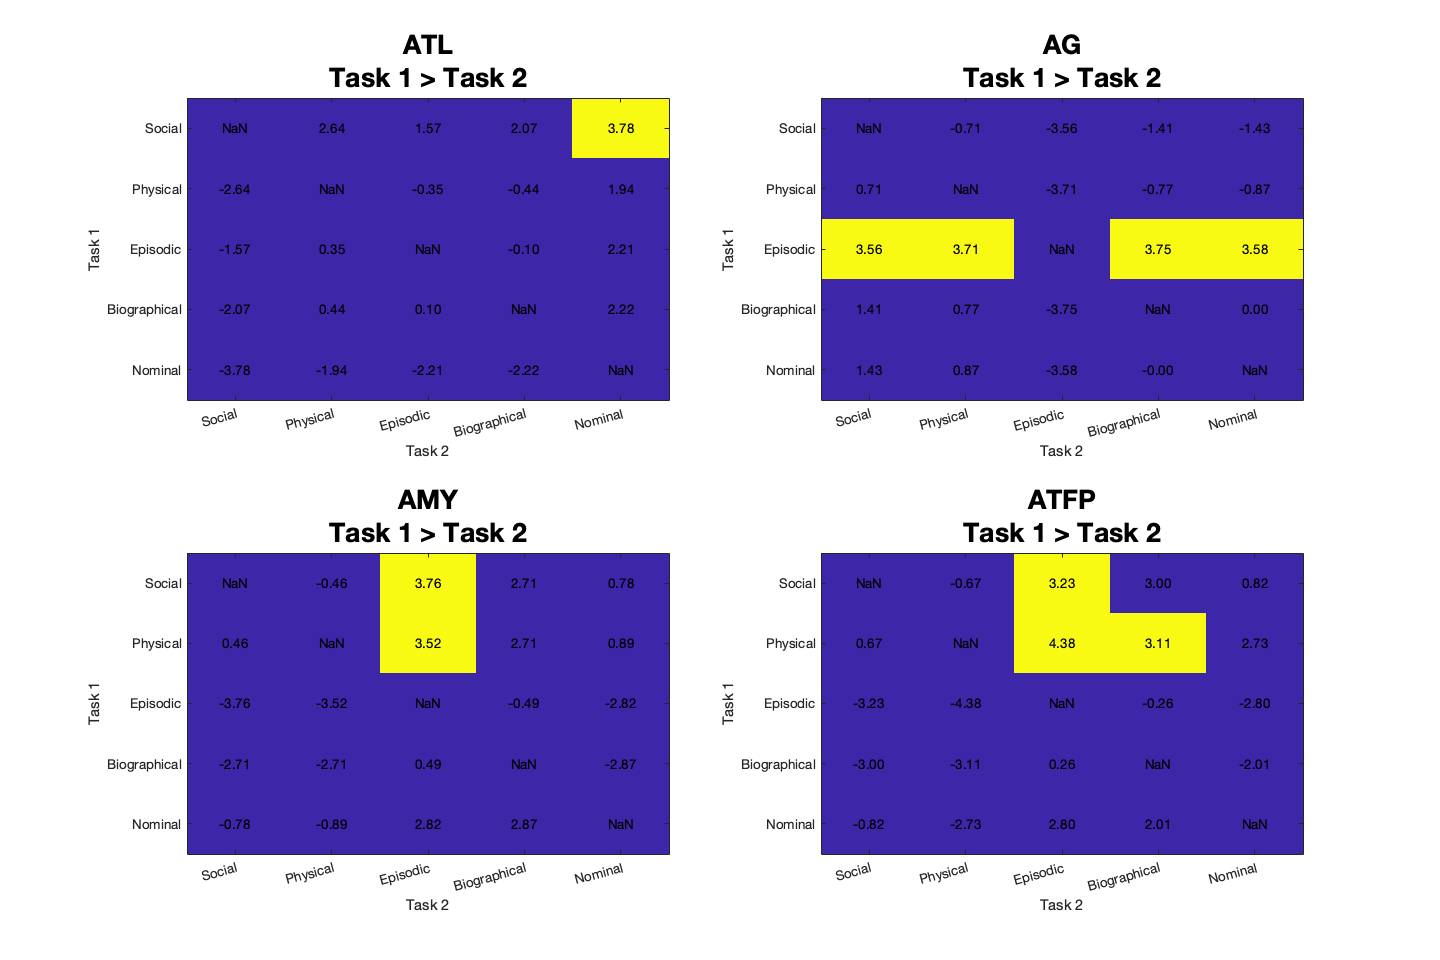

In [12]:
subplot(2,2,1)
func_tiny_test('ATL',tiny,0,1)

subplot(2,2,2)
func_tiny_test('AG',tiny,0,1)

subplot(2,2,3)
func_tiny_test('AMY',tiny,0,1)

subplot(2,2,4)
func_tiny_test('ATFP',tiny,0,1)

# NetRSA analyses

In [13]:
netRSA.mat = aBeta.wmat;
netRSA.rlbls = rlbls;
netRSA.tlbls = tlbls10;

% Trim Matrix to drop Core Rois
roi_to_drop = {'OFA-L' 'OFA-R' 'FFA-L' 'FFA-R' 'pSTS-L' 'pSTS-R'};
drop_inds = ismember(netRSA.rlbls,roi_to_drop);

netRSA.mat(drop_inds,:,:) = [];
netRSA.rlbls(drop_inds) = [];

In [14]:
cmats = func_make_cmat(netRSA.mat);
netRSA.rcmat = cmats{1};
netRSA.tcmat = cmats{2};

netRSA

ROIs:15,Tasks:10,Subs:24

netRSA = 

  struct with fields:

      mat: [15x10x24 double]
    rlbls: {15x1 cell}
    tlbls: {10x1 cell}
    rcmat: [15x15x24 double]
    tcmat: [10x10x24 double]



In [15]:
%%file func_plot_dendMat_names.m
function res = func_plot_dendMat_names(mats,lbls);
% func_plot_dendMat(mats,lbls)
% Function that plots dendrograms, takes in a single matrix, or a cell of matrices (and appropriate lables)

if length(mats)~=length(lbls); error('number of mats doesnt match num of labels');end

res = [];cc = 0;
if iscell(mats);
    numMats = length(mats);
    mats = mats;
else
    numMats = 1;
    mats = {mats};
    lbls = {lbls};
end

for i = 1:numMats;
cc = cc+1;;

sp = subplot(numMats,2,cc);

%mats{i} = atanh(mats{i}); % Fisher Transformation

Y = 1-get_triu(mats{i});
Z = linkage(Y,'ward');
[h x perm] = dendrogram(Z,0,'labels',lbls{i});
ylabel('dissimilarity (a.u)')
[h(1:end).LineWidth] = deal(2);

sp.FontSize = 14;
sp.FontWeight = 'bold';

ord = perm; % get ordering to return
res.ord{i} = ord;
[h(1:end).LineWidth] = deal(3);
xtickangle(45);

cc = cc+1;
sp = subplot(numMats,2,cc);

if length(mats{i}) < 11
    add_numbers_to_mat(mats{i}(ord,ord),lbls{i}(ord));
else
add_numbers_to_mat(mats{i}(ord,ord),lbls{i}(ord),'nonum');
end
colorbar

xtickangle(45)
sp.CLim = [min(get_triu(mats{i})) max(get_triu(mats{i}))];
sp.FontSize = 14;
sp.FontWeight = 'bold';
end % ends matrix loop
end % ends function

Created file '/Users/aidasaglinskas/Google Drive/Aidas/Data_words/Scripts/func_plot_dendMat_names.m'.


ROIs:15,Tasks:10,Subs:24
> In linkage (line 171)
  In func_plot_dendMat_names (line 25)


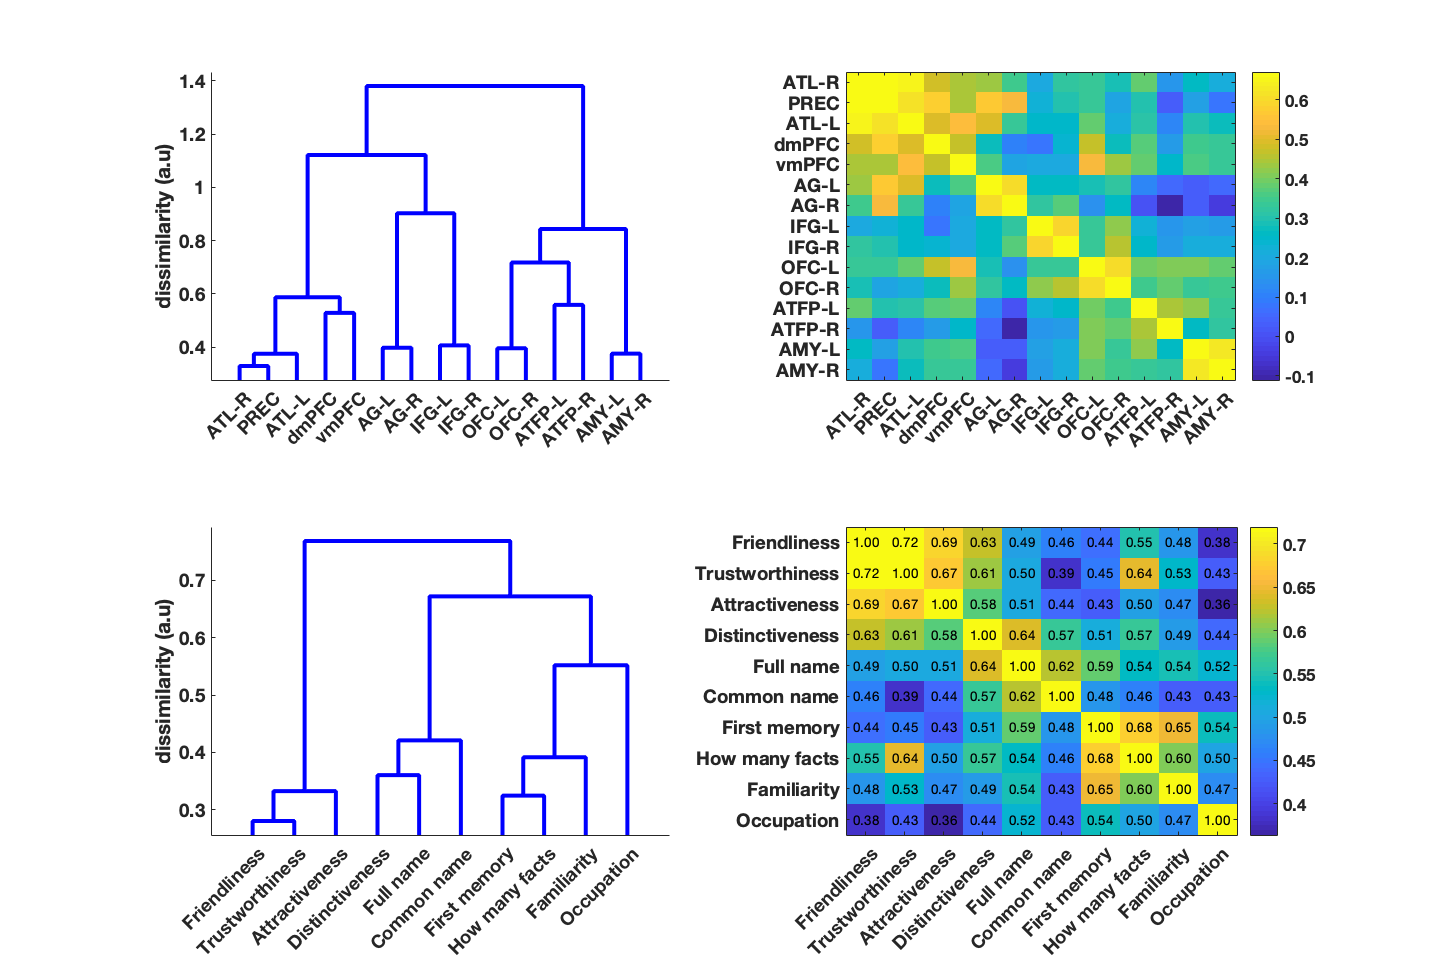

In [16]:
in_mat = netRSA.mat;
cmats = func_make_cmat(in_mat); % Make similarity matrices
res = func_plot_dendMat_names({mean(netRSA.rcmat,3) mean(netRSA.tcmat,3)},{netRSA.rlbls netRSA.tlbls}); %Plot dendrograms



## NetRSA models


In [44]:

%func_made_RSA_model
%func_fit_RSA_model
clust = {};
clust_ttl = {};
l = 0;
%l = l+1;clust{l} = {{}{}}

l = l+1;
clust_ttl{l} = 'DMN vs AMY+ATFP';
clust{l} = {{'ATL-L'    'ATL-R'    'PREC'    'dmPFC'    'vmPFC'    'AG-L'    'AG-R'} { 'AMY-L'    'AMY-R'    'ATFP-L' 'ATFP-R'}};

l = l+1;
clust_ttl{l} ='DMN+IFG vs AMY+ATFP';
clust{l} = {{'ATL-L'    'ATL-R'    'PREC'    'dmPFC'    'vmPFC'    'AG-L'    'AG-R' 'IFG-L'    'IFG-R' } {'AMY-L'    'AMY-R'    'ATFP-L' 'ATFP-R'}};

l = l+1;
clust_ttl{l} = 'DMN vs AMY+ATFP+IFG';
clust{l} = {{'ATL-L'    'ATL-R'    'PREC'    'dmPFC'    'vmPFC'    'AG-L'    'AG-R'  } {'IFG-L'    'IFG-R'  'AMY-L'    'AMY-R'    'ATFP-L' 'ATFP-R'}};


l = l+1;
clust_ttl{l} = 'DMN+OFC vs AMY+ATFP+OFC';
clust{l} = {{'ATL-L'    'ATL-R'    'PREC'    'dmPFC'    'vmPFC'    'AG-L'    'AG-R'  'OFC-L'    'OFC-R'} {  'AMY-L'    'AMY-R'    'ATFP-L' 'ATFP-R'}};

l = l+1;
clust_ttl{l} = 'DMN vs AMY+ATFP+OFC';
clust{l} = {{'ATL-L'    'ATL-R'    'PREC'    'dmPFC'    'vmPFC'    'AG-L'    'AG-R'  } {'OFC-L'    'OFC-R' 'AMY-L'    'AMY-R'    'ATFP-L' 'ATFP-R'}};

l = l+1;
clust_ttl{l} = 'DMN+IFG vs AMY+ATFP+OFC';
clust{l} = {{'ATL-L'    'ATL-R'    'PREC'    'dmPFC'    'vmPFC'    'AG-L'    'AG-R'  'IFG-L'    'IFG-R'} {'OFC-L'    'OFC-R' 'AMY-L'    'AMY-R'    'ATFP-L' 'ATFP-R'}};

l = l+1;
clust_ttl{l} = 'DMN+IFG vs AMY+ATFP+OFC';
clust{l} = {{'ATL-L'    'ATL-R'    'PREC'    'dmPFC'    'vmPFC'    'AG-L'    'AG-R'  'IFG-L'    'IFG-R'} {'OFC-L'    'OFC-R' 'AMY-L'    'AMY-R'    'ATFP-L' 'ATFP-R'}};

l = l+1;
clust_ttl{l} = 'DMN vs AMY+ATFP+OFC+IFG';
clust{l} = {{'ATL-L'    'ATL-R'    'PREC'    'dmPFC'    'vmPFC'    'AG-L'    'AG-R' } {'IFG-L'    'IFG-R' 'OFC-L'    'OFC-R' 'AMY-L'    'AMY-R'    'ATFP-L' 'ATFP-R'}};

l = l+1;
clust_ttl{l} = 'DMN vs AG+IFG AMY+ATFP+OFC';
clust{l} = {{'ATL-L'    'ATL-R'    'PREC'    'dmPFC'    'vmPFC'} {'AG-L'    'AG-R'  'IFG-L'    'IFG-R'} {'OFC-L'    'OFC-R' 'AMY-L'    'AMY-R'    'ATFP-L' 'ATFP-R'}};

l = l+1;
clust_ttl{l} = 'DMN vs IFG+OFC AMY+ATFP';
clust{l} = {{'ATL-L'    'ATL-R'    'PREC'    'dmPFC'    'vmPFC' 'AG-L'    'AG-R'  } {'IFG-L'    'IFG-R' 'OFC-L'    'OFC-R'} { 'AMY-L'    'AMY-R'    'ATFP-L' 'ATFP-R'}};

nmodels = length(clust);

In [45]:
disp(netRSA.rlbls')

  Columns 1 through 7

    'ATL-L'    'ATL-R'    'PREC'    'dmPFC'    'vmPFC'    'AG-L'    'AG-R'

  Columns 8 through 14

    'IFG-L'    'IFG-R'    'OFC-L'    'OFC-R'    'AMY-L'    'AMY-R'    'ATFP-L'

  Column 15

    'ATFP-R'



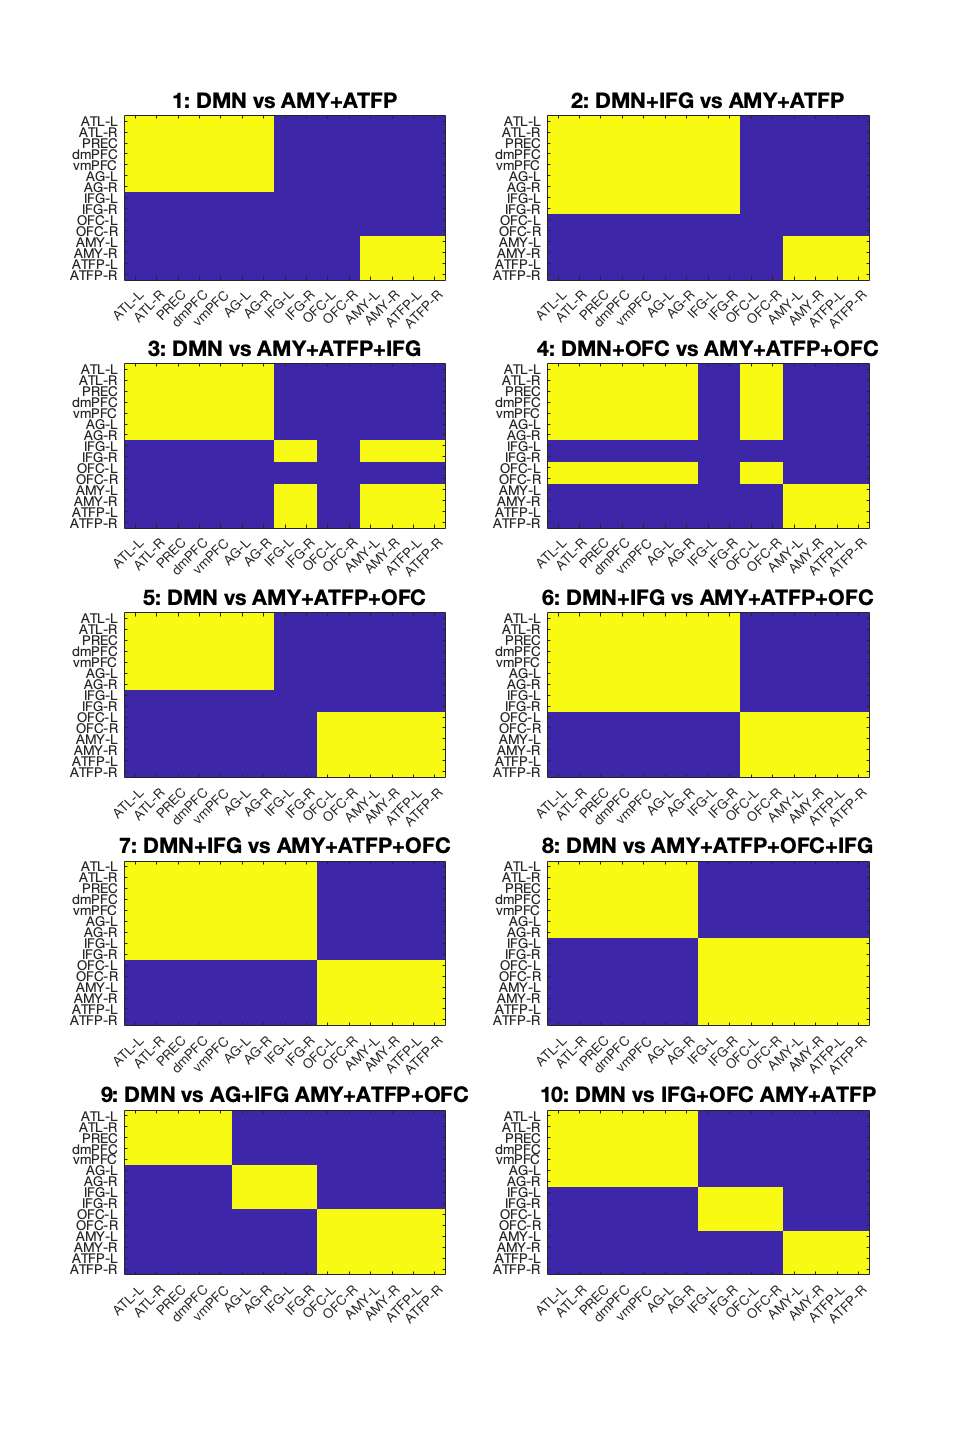

In [46]:
%none plot --size 1000,1500
model = [];
show_model = 1;
for i = 1:nmodels
model(:,:,i) = func_made_RSA_model(netRSA.rlbls,clust{i});

    if show_model
    subplot(ceil(length(clust)/2),2,i);
    add_numbers_to_mat(model(:,:,i),netRSA.rlbls,'nonum');
    xtickangle(45)
    title([num2str(i) ': ' clust_ttl{i}],'fontsize',16)
    end
end

In [34]:
%%file func_test_pairwise.m
function func_test_pairwise(dt,lbls,print_statements,plot_mats)

if ~exist('print_statements');print_statements=0;end
if ~exist('plot_mats');plot_mats=0;end

tmat = [];
for t1 = 1:size(dt,2)
for t2 = 1:size(dt,2)

v1 = dt(:,t1);
v2 = dt(:,t2);

t_thresh = 2.069; % p < .05
%t_thresh = 3.104; % p < .005 == bonferroni correction for 10 comparisons
%t_thresh = 3.767; % p < .001

[H,P,CI,STATS] = ttest(v1,v2);
tmat(t1,t2) = STATS.tstat;
    if print_statements
    if ~isnan(H)
    if H & STATS.tstat > 0
    disp(sprintf('%s > %s',lbls{t1},lbls{t2}))
    t_statement(STATS,P);
    end
    end
    end
    
end
end

    if plot_mats
    add_numbers_to_mat(tmat,lbls);
    ylabel('1');
    xlabel('2');
    title({'1 > 2'},'fontsize',20);
    set(gca,'CLim',[t_thresh t_thresh+.0001])
    %set(gca,'fontsize',12)
    end

Created file '/Users/aidasaglinskas/Google Drive/Aidas/Data_words/Scripts/func_test_pairwise.m'.


In [41]:
%%file func_fit_RSA_model.m
function model_fit = func_fit_RSA_model(data,model)
% model_fit = func_fit_RSA_model(data,model)
%data = tcmats;
%model = model;

if ndims(data) ~= 3;error('model not 3d');end
if ~iscell(model);model = {model};end
if size(model{1},1) ~= size(data,1); error('model and data size mismatch');end
nmodels = length(model);
warning('off','stats:linkage:NotEuclideanMatrix');

for m = 1:nmodels
use_model = model{m};
use_data = data;

use_data = atanh(use_data);
drop_inds = sum(use_model,2)==0;
% Not use empty cells
    use_model(drop_inds,:) = [];
    use_model(:,drop_inds) = [];
    use_data(drop_inds,:,:) = [];
    use_data(:,drop_inds,:) = [];

for s = 1:size(data,3)
v1 = get_triu(use_model)';
    v1 = v1-mean(v1);
v2 = get_triu(use_data(:,:,s))';
    v2 = v2-mean(v2);
model_fit(s,m) = corr(v1,v2);
end
end


end

Created file '/Users/aidasaglinskas/Google Drive/Aidas/Data_words/Scripts/func_fit_RSA_model.m'.


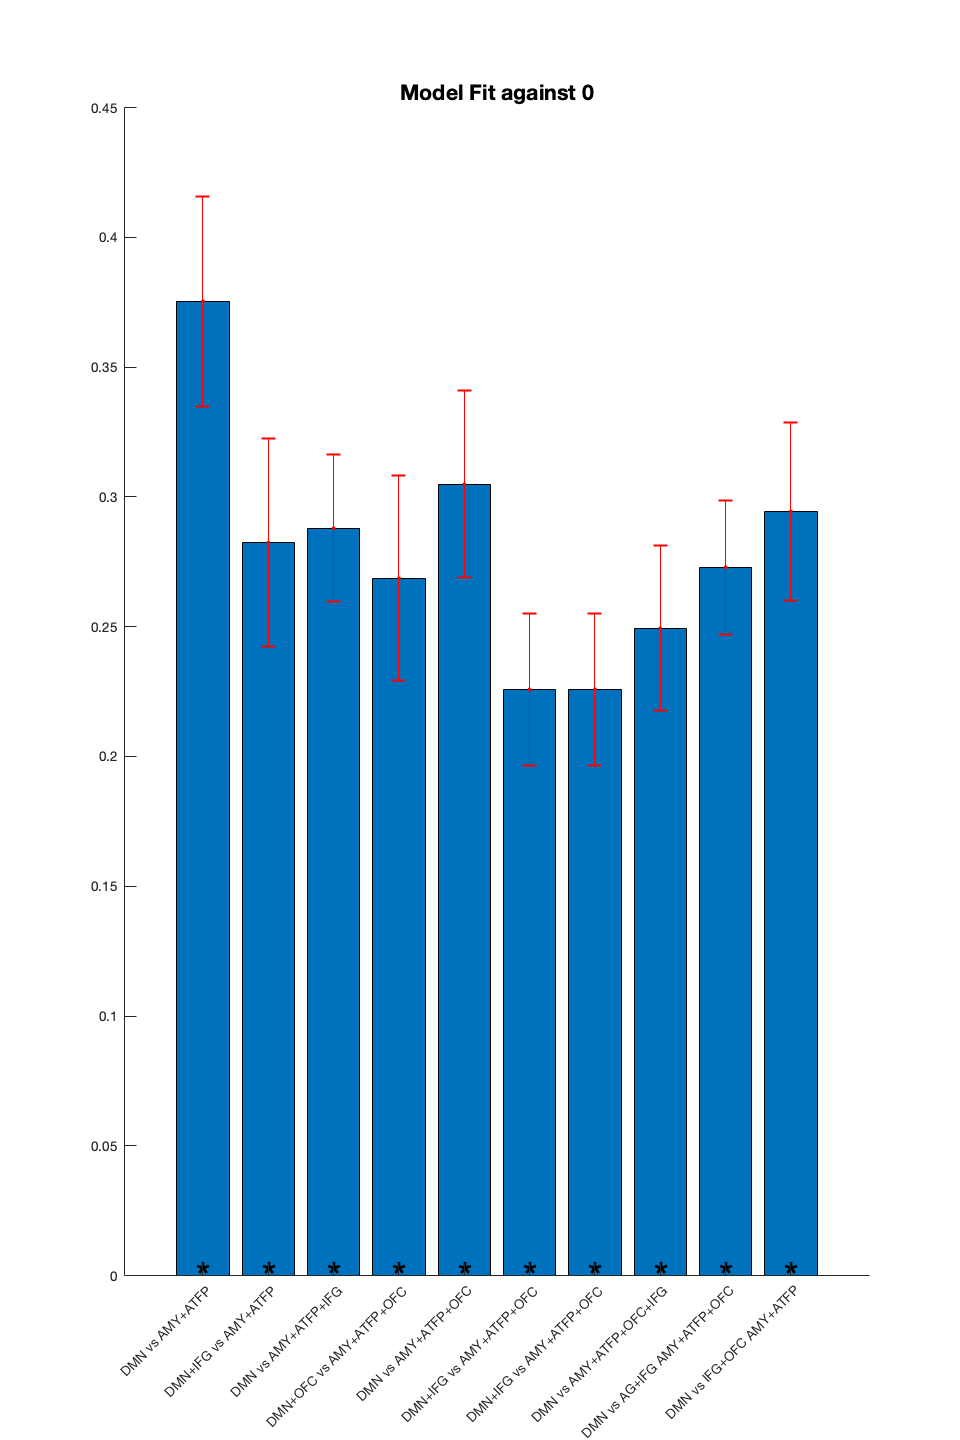

In [47]:
dt = [];
for i = 1:nmodels;
dt(:,i) = func_fit_RSA_model(netRSA.rcmat,model(:,:,i));
end

func_plot_tbar_plot(dt,clust_ttl)
title('Model Fit against 0','fontsize',16)

DMN vs AMY+ATFP > DMN+IFG vs AMY+ATFP
t(23) = 4.74,p < 0.001
DMN vs AMY+ATFP > DMN vs AMY+ATFP+IFG
t(23) = 3.72,p = 0.001
DMN vs AMY+ATFP > DMN+OFC vs AMY+ATFP+OFC
t(23) = 4.40,p < 0.001
DMN vs AMY+ATFP > DMN vs AMY+ATFP+OFC
t(23) = 3.12,p = 0.005
DMN vs AMY+ATFP > DMN+IFG vs AMY+ATFP+OFC
t(23) = 6.61,p < 0.001
DMN vs AMY+ATFP > DMN+IFG vs AMY+ATFP+OFC
t(23) = 6.61,p < 0.001
DMN vs AMY+ATFP > DMN vs AMY+ATFP+OFC+IFG
t(23) = 3.81,p < 0.001
DMN vs AMY+ATFP > DMN vs AG+IFG AMY+ATFP+OFC
t(23) = 2.62,p = 0.015
DMN vs AMY+ATFP > DMN vs IFG+OFC AMY+ATFP
t(23) = 4.96,p < 0.001
DMN+IFG vs AMY+ATFP > DMN+IFG vs AMY+ATFP+OFC
t(23) = 2.63,p = 0.015
DMN+IFG vs AMY+ATFP > DMN+IFG vs AMY+ATFP+OFC
t(23) = 2.63,p = 0.015
DMN vs AMY+ATFP+IFG > DMN+IFG vs AMY+ATFP+OFC
t(23) = 2.33,p = 0.029
DMN vs AMY+ATFP+IFG > DMN+IFG vs AMY+ATFP+OFC
t(23) = 2.33,p = 0.029
DMN vs AMY+ATFP+IFG > DMN vs AMY+ATFP+OFC+IFG
t(23) = 2.57,p = 0.017
DMN vs AMY+ATFP+OFC > DMN+IFG vs AMY+ATFP+OFC
t(23) = 4.19,p < 0.001
DMN vs AMY

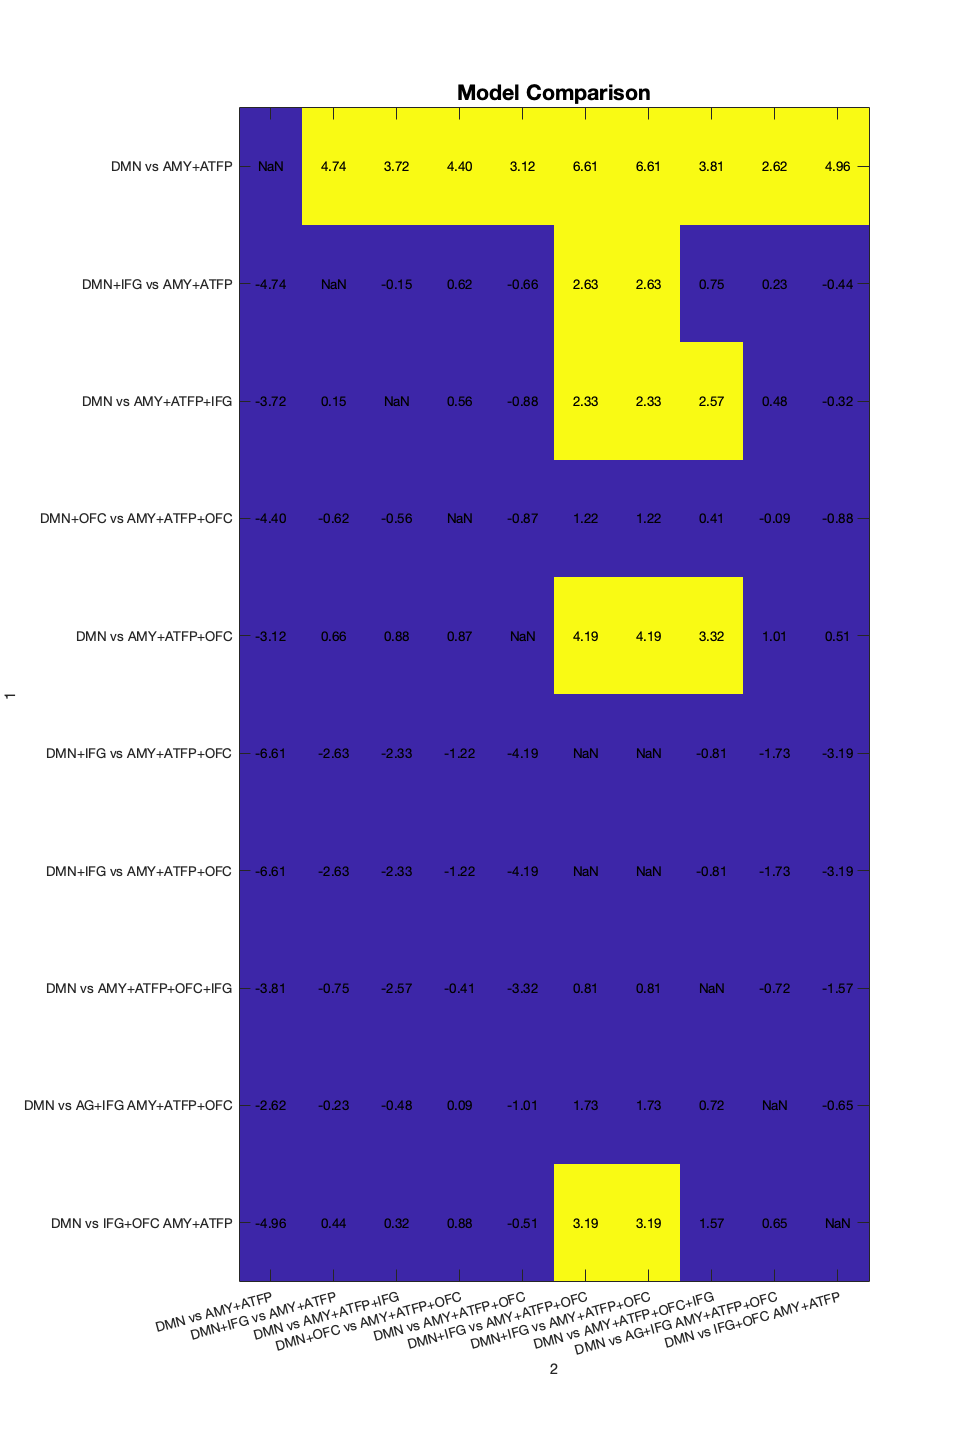

In [48]:
func_test_pairwise(dt,clust_ttl,1,1);
title('Model Comparison','fontsize',16);

In [37]:
disp(datestr(datetime))

31-Jan-2019 19:05:13


In [39]:
which func_fit_RSA_model

/Users/aidasaglinskas/Google Drive/Aidas/Data_words/Scripts/func_fit_RSA_model.m
